# 2.1 Analyses of states per trial epoch

In [1]:

""" 
IMPORTS
"""
import os
import autograd.numpy as np
import pickle
import seaborn as sns
from collections import defaultdict
import pandas as pd

from one.api import ONE
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, Normalizer

# Get my functions
functions_path =  '/home/ines/repositories/representation_learning_variability/Models/Sub-trial//2_fit_models/'
# functions_path = '/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability//Models/Sub-trial//2_fit_models/'
os.chdir(functions_path)
from preprocessing_functions import concatenate_sessions, fix_discontinuities
functions_path =  '/home/ines/repositories/representation_learning_variability/Models/Sub-trial//3_postprocess_results/'
# functions_path = '/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability//Models/Sub-trial//2_fit_models/'
os.chdir(functions_path)
from postprocessing_functions import remove_states_str
from plotting_functions import plot_avg_state, align_bin_design_matrix, states_per_trial_phase, plot_states_aligned_trial, plot_states_aligned, traces_over_few_sates, broader_label

# one = ONE(base_url='https://alyx.internationalbrainlab.org')
one = ONE(mode='remote')

## Parameters

In [2]:
bin_size = 0.1
# bin_size = 0.02

# Plotting params
multiplier = 1/bin_size

event_type_list = ['goCueTrigger_times']  # , 'feedback_times', 'firstMovement_times'
event_type_name = ['Go cue']  # , 'Feedback time', 'First movement onset'

num_train_batches = 5
threshold = 0.01

# Values for grid search (should get this from results)
last_lag = 20
lag_step = 2
start_lag = 1
Lags = list(range(start_lag, last_lag, lag_step))
kappas = [0, 1, 5, 10, 100, 500, 1000, 2000, 5000, 7000, 10000]


## Get data

In [3]:
# Load preprocessed data
prepro_results_path =  '/home/ines/repositories/representation_learning_variability/DATA/Sub-trial/Results/' + str(bin_size) + '/'
os.chdir(prepro_results_path)
idxs, mouse_names, matrix_all, matrix_all_unnorm, session_all = pickle.load(open(prepro_results_path + "preprocessed_data_v4_170724", "rb"))
collapsed_matrices, collapsed_unnorm, collapsed_trials = concatenate_sessions (mouse_names, matrix_all, matrix_all_unnorm, session_all)

## Plot combined states per animal

In [4]:
use_sets = [['avg_wheel_vel'], ['Lick count'], ['whisker_me'],
            ['left_X', 'left_Y', 'right_X', 'right_Y'], ['nose_X', 'nose_Y']]
use_sets = [['avg_wheel_vel'], ['Lick count'], ['whisker_me'],
            ['left_X', 'left_Y', 'right_X', 'right_Y']]
use_sets = [['avg_wheel_vel'], ['Lick count'], ['whisker_me']]
var_interest_map = ['avg_wheel_vel', 'Lick count', 'whisker_me', 'left_X', 'nose_X']
idx_init_list = [0, 1, 2, 3, 7]
idx_end_list = [1, 2, 3, 7, 9]

## Plot overview

/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  quiescence_states = quiescence_states.append(quiescence_data[['correct', 'choice', 'contrast', 'most_likely_states', 'Bin']])
/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:229: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correct_states = correct_states.append(correct_data[['correct', 'choice', 'contrast', 'most_likely_states', 'Bin']])
/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

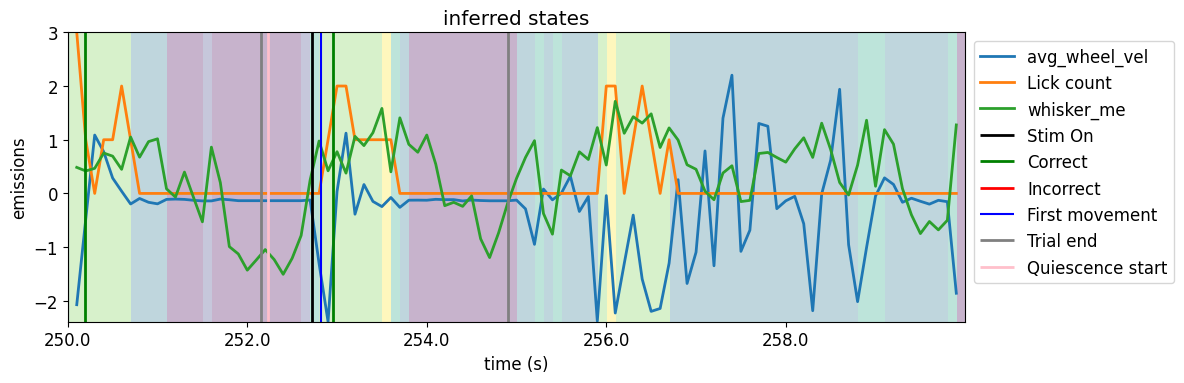

/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:800: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='variable', x='value', data=use_data, ax=ax[0,s], palette='plasma')
/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:800: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='variable', x='value', data=use_data, ax=ax[0,s], palette='plasma')
/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:800: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be rem

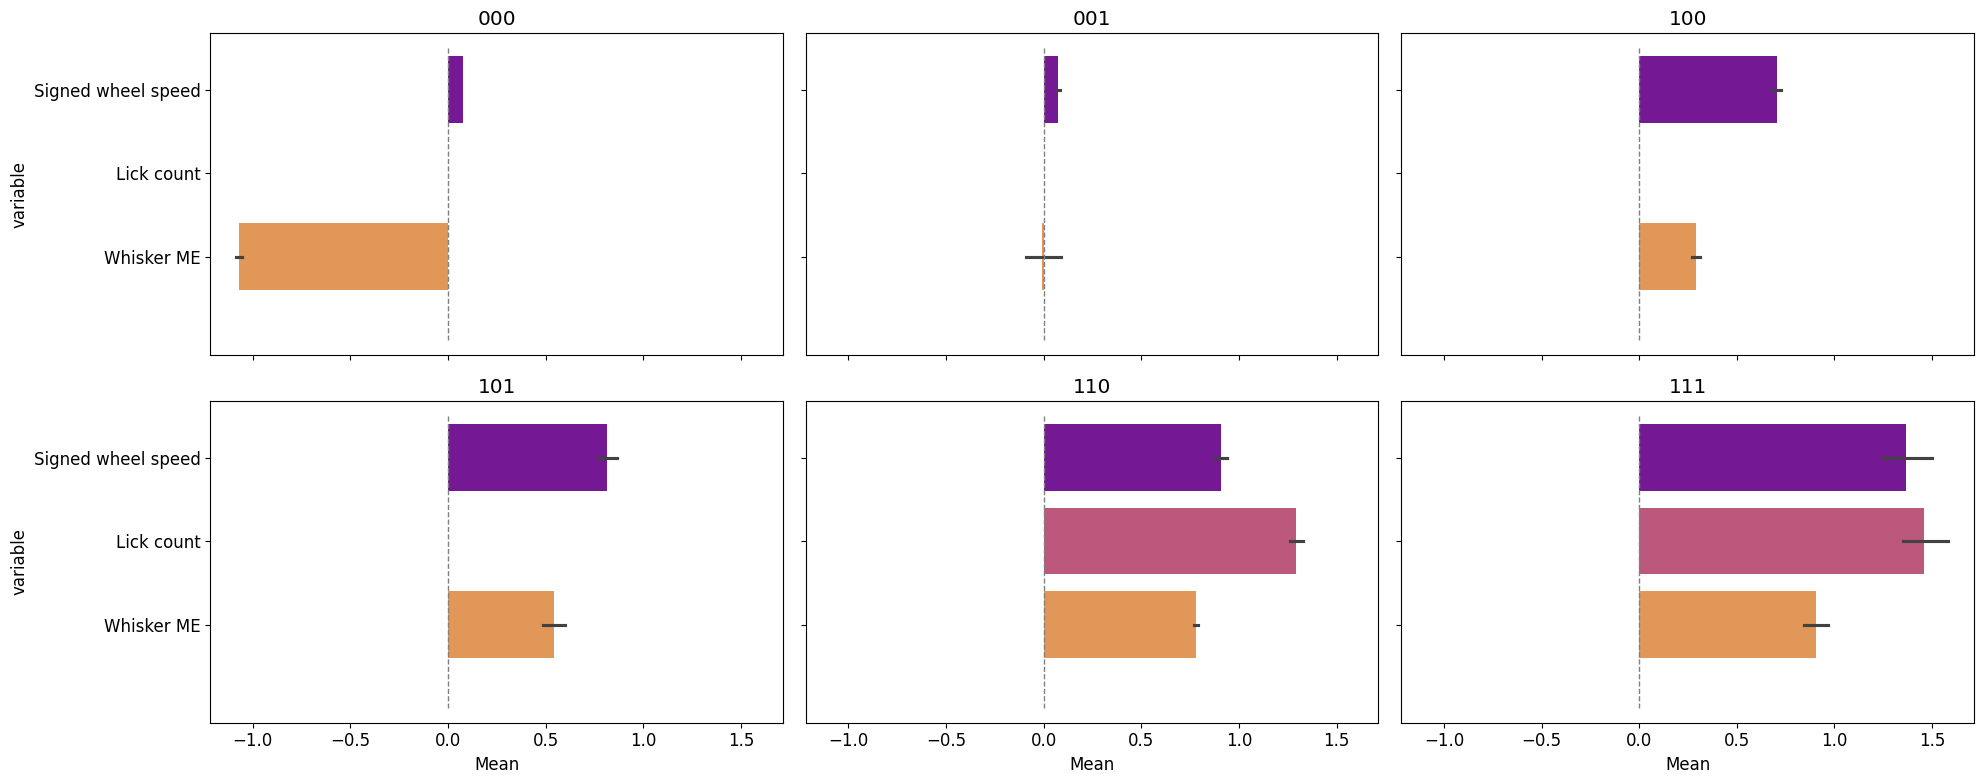

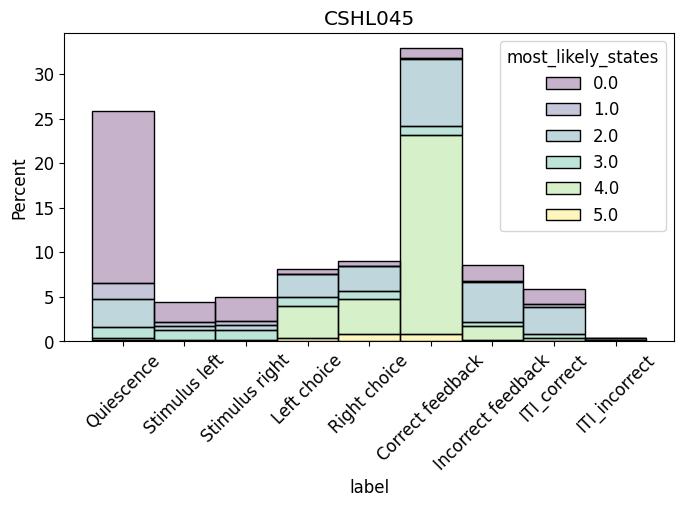

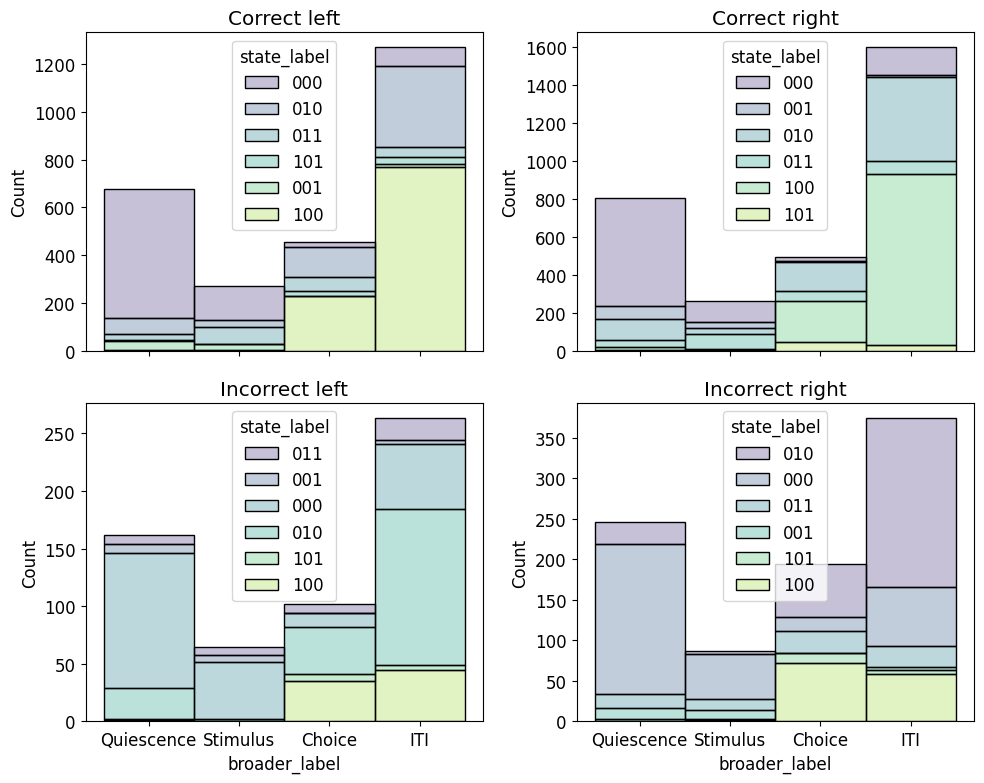

/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  quiescence_states = quiescence_states.append(quiescence_data[['correct', 'choice', 'contrast', 'most_likely_states', 'Bin']])
/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:229: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correct_states = correct_states.append(correct_data[['correct', 'choice', 'contrast', 'most_likely_states', 'Bin']])
/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

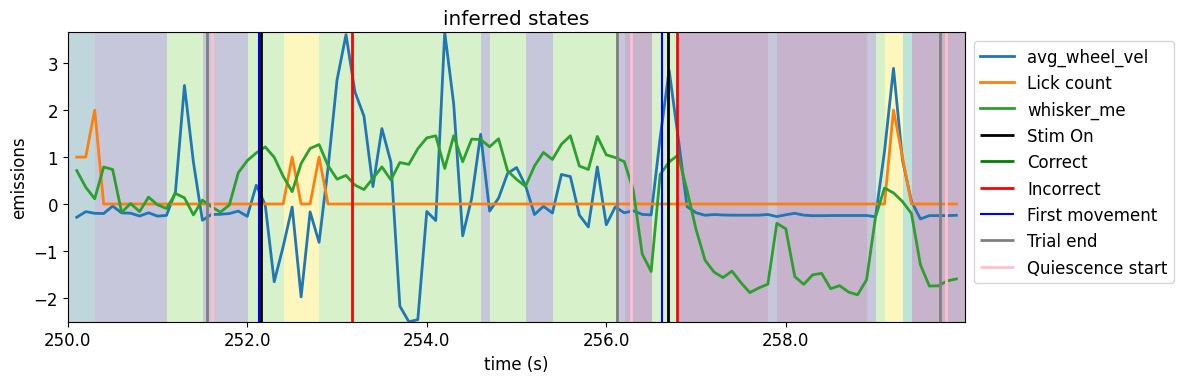

/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:800: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='variable', x='value', data=use_data, ax=ax[0,s], palette='plasma')
/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:800: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='variable', x='value', data=use_data, ax=ax[0,s], palette='plasma')
/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:800: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be rem

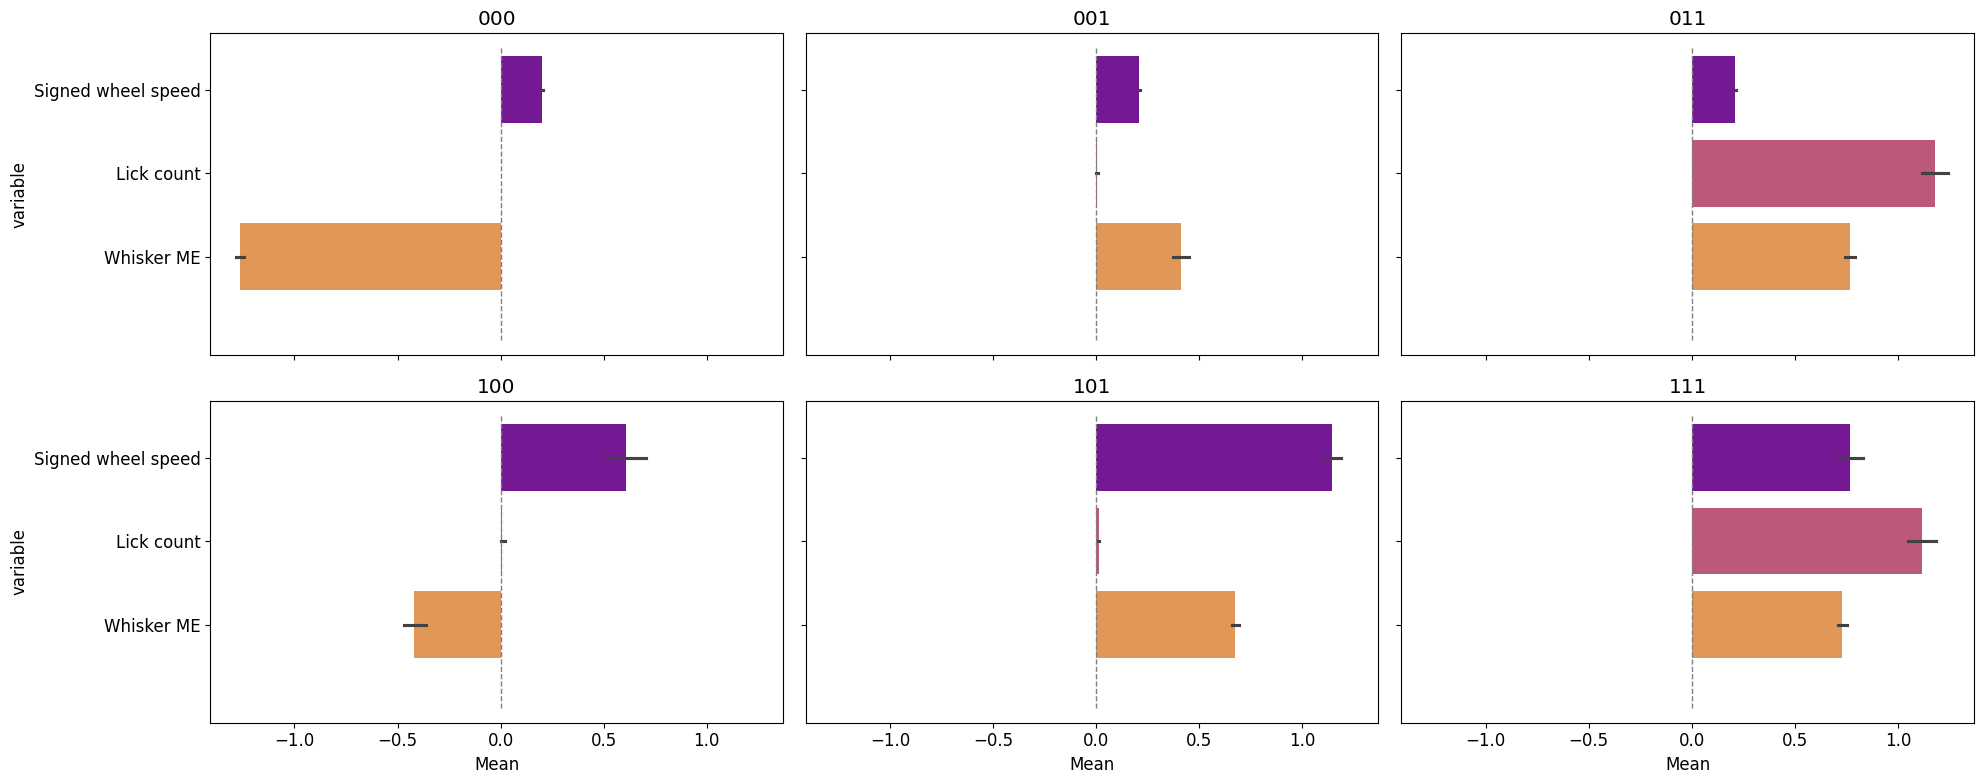

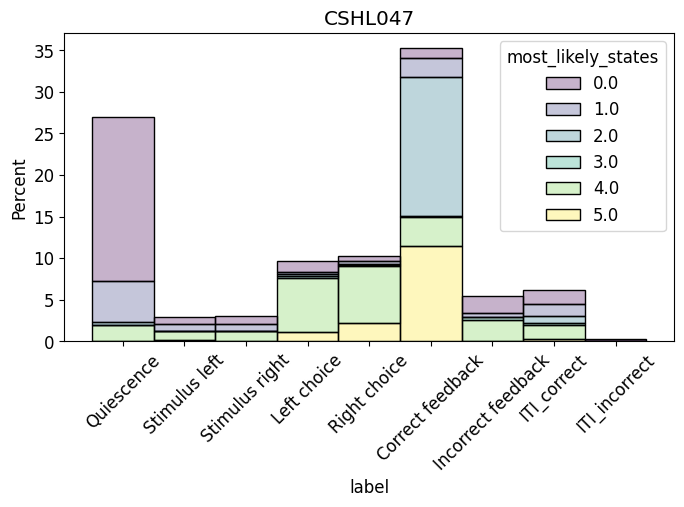

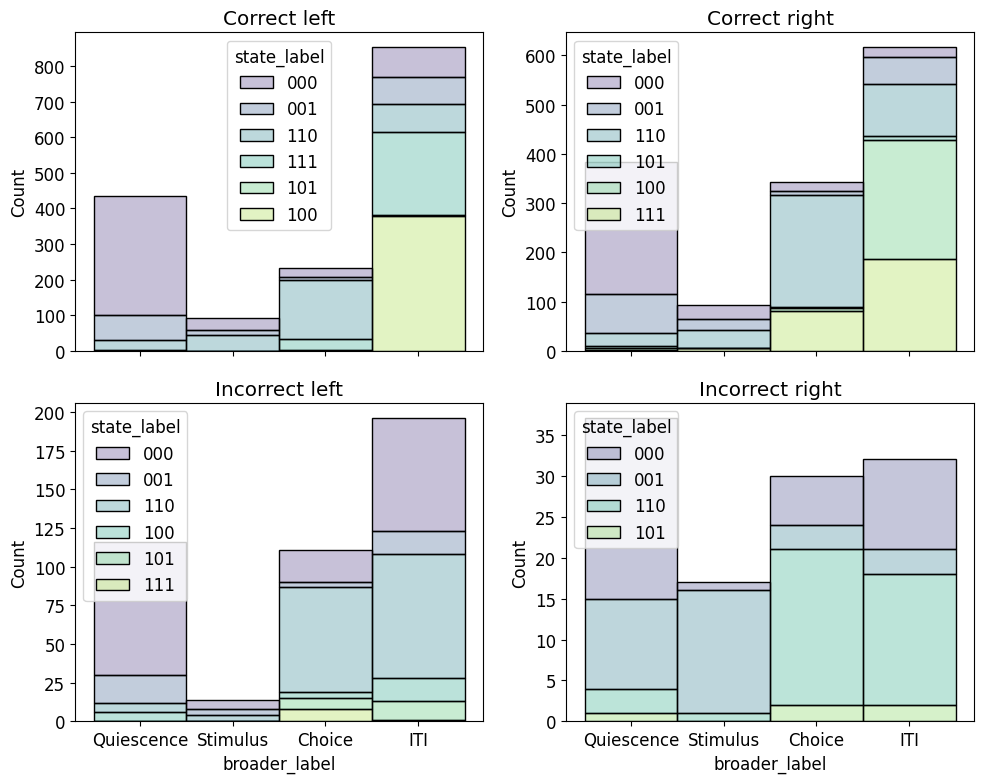

/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  quiescence_states = quiescence_states.append(quiescence_data[['correct', 'choice', 'contrast', 'most_likely_states', 'Bin']])
/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:229: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correct_states = correct_states.append(correct_data[['correct', 'choice', 'contrast', 'most_likely_states', 'Bin']])
/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

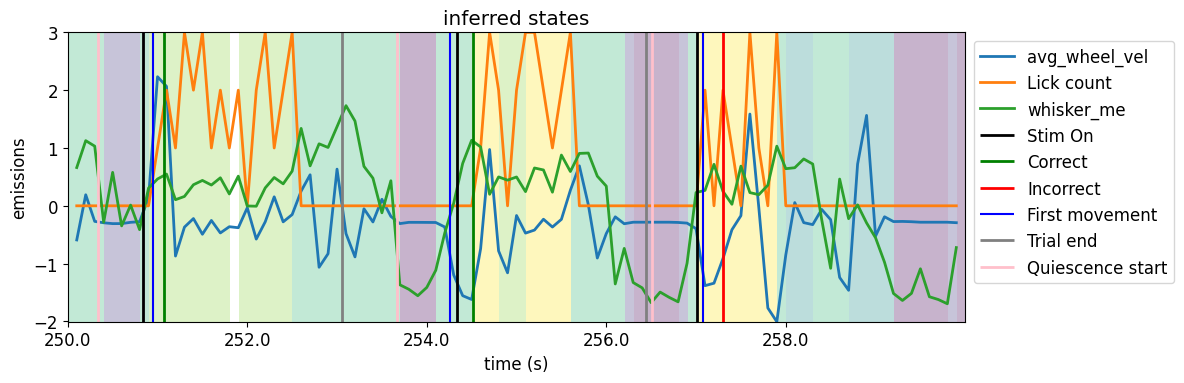

/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:800: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='variable', x='value', data=use_data, ax=ax[0,s], palette='plasma')
/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:800: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='variable', x='value', data=use_data, ax=ax[0,s], palette='plasma')
/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:800: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be rem

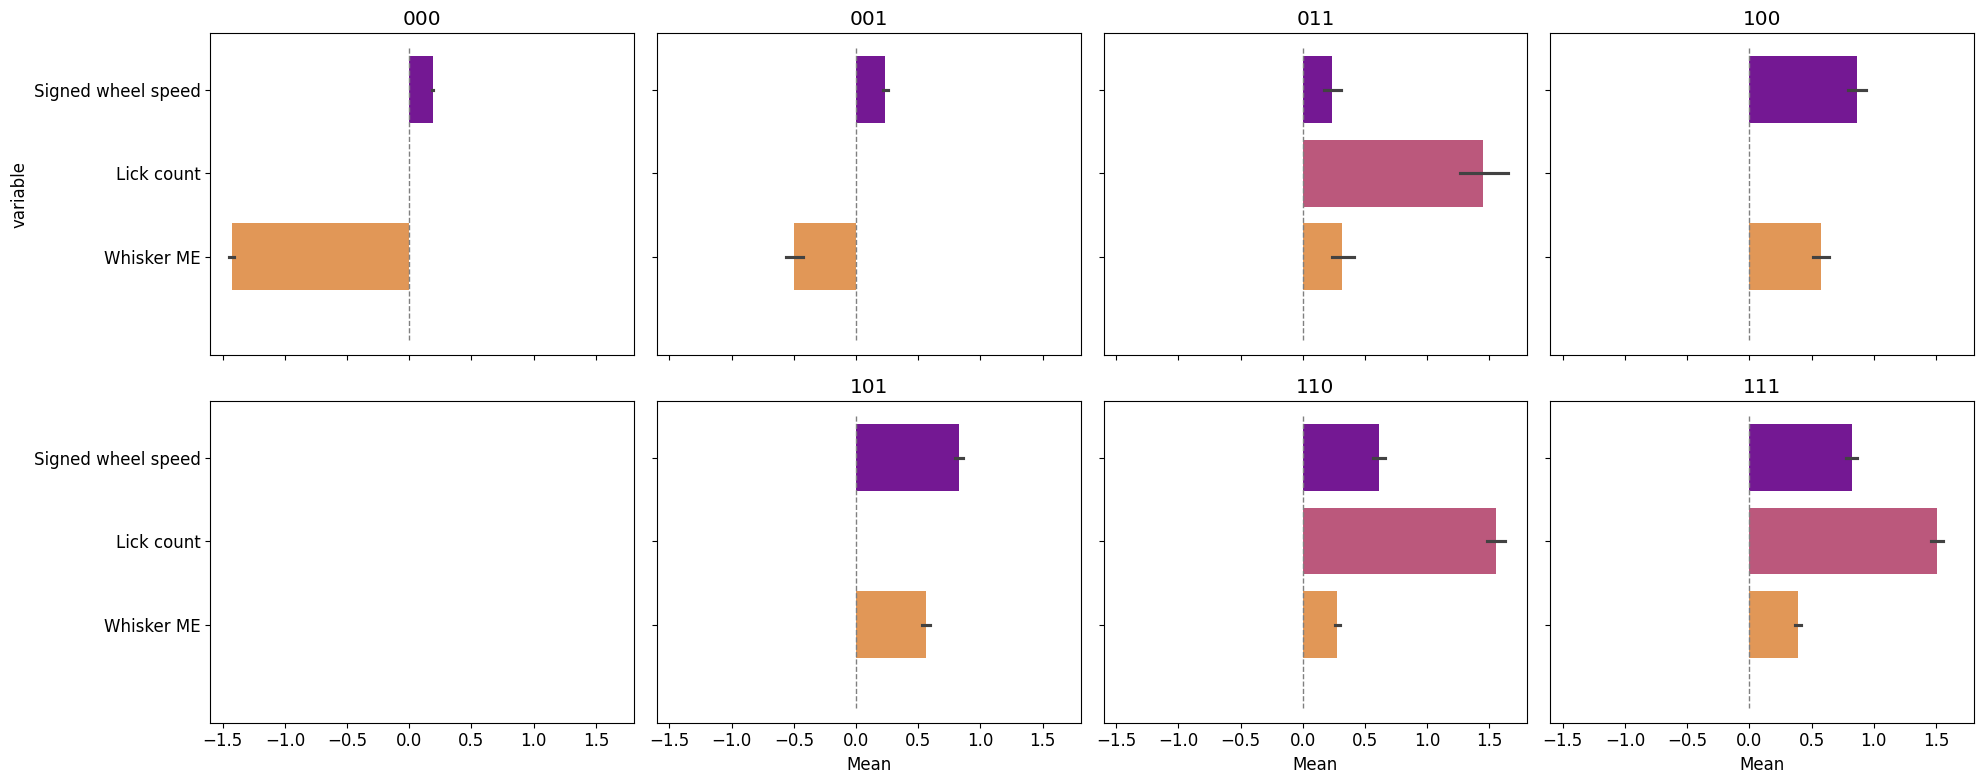

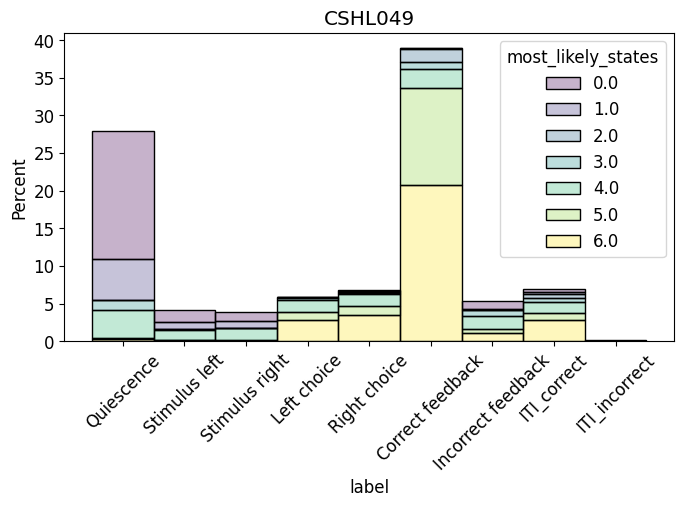

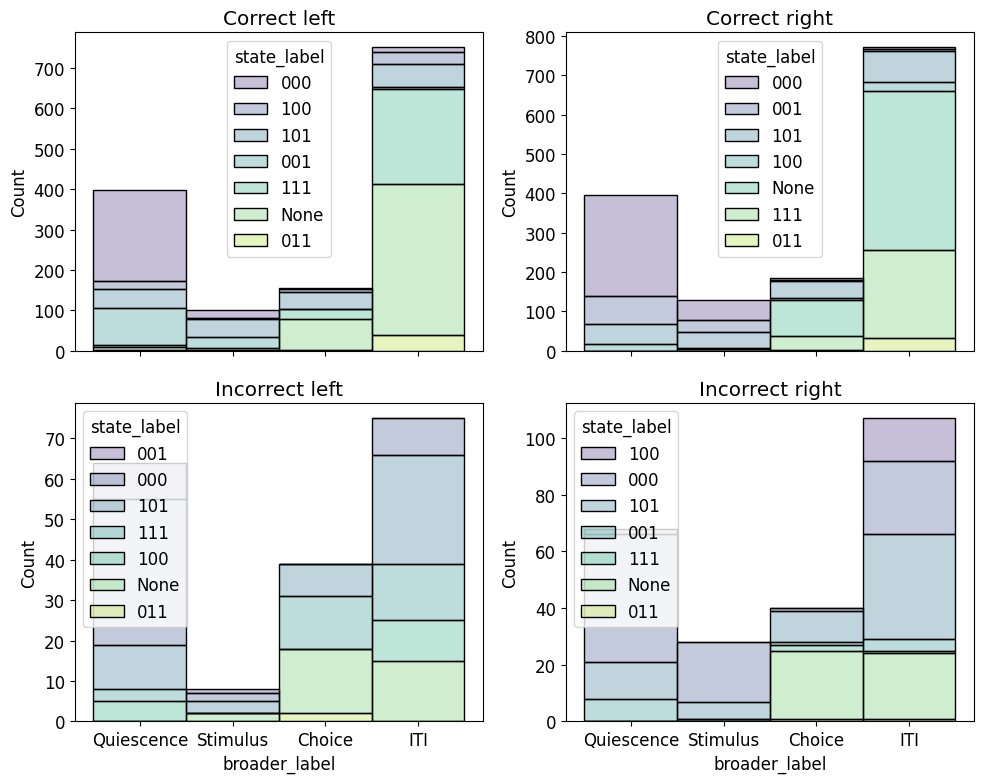

/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  quiescence_states = quiescence_states.append(quiescence_data[['correct', 'choice', 'contrast', 'most_likely_states', 'Bin']])
/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:229: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correct_states = correct_states.append(correct_data[['correct', 'choice', 'contrast', 'most_likely_states', 'Bin']])
/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

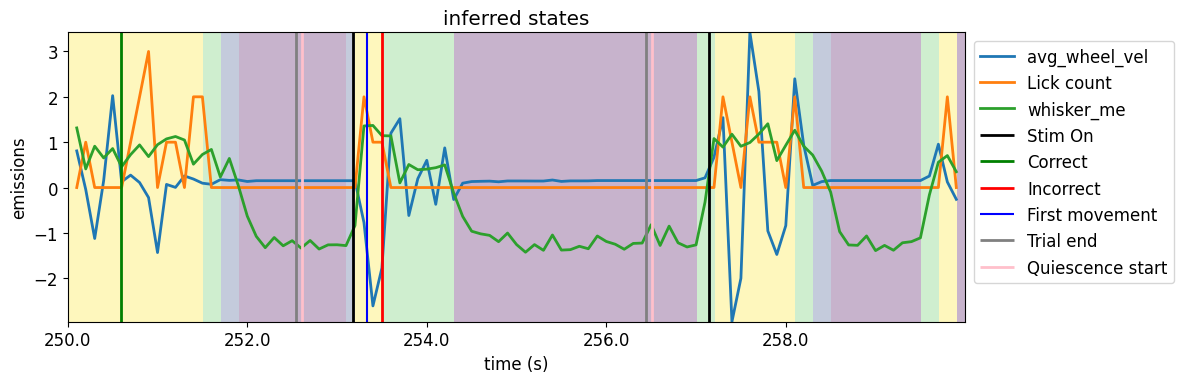

/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:800: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='variable', x='value', data=use_data, ax=ax[0,s], palette='plasma')
/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:800: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='variable', x='value', data=use_data, ax=ax[0,s], palette='plasma')
/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:800: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be rem

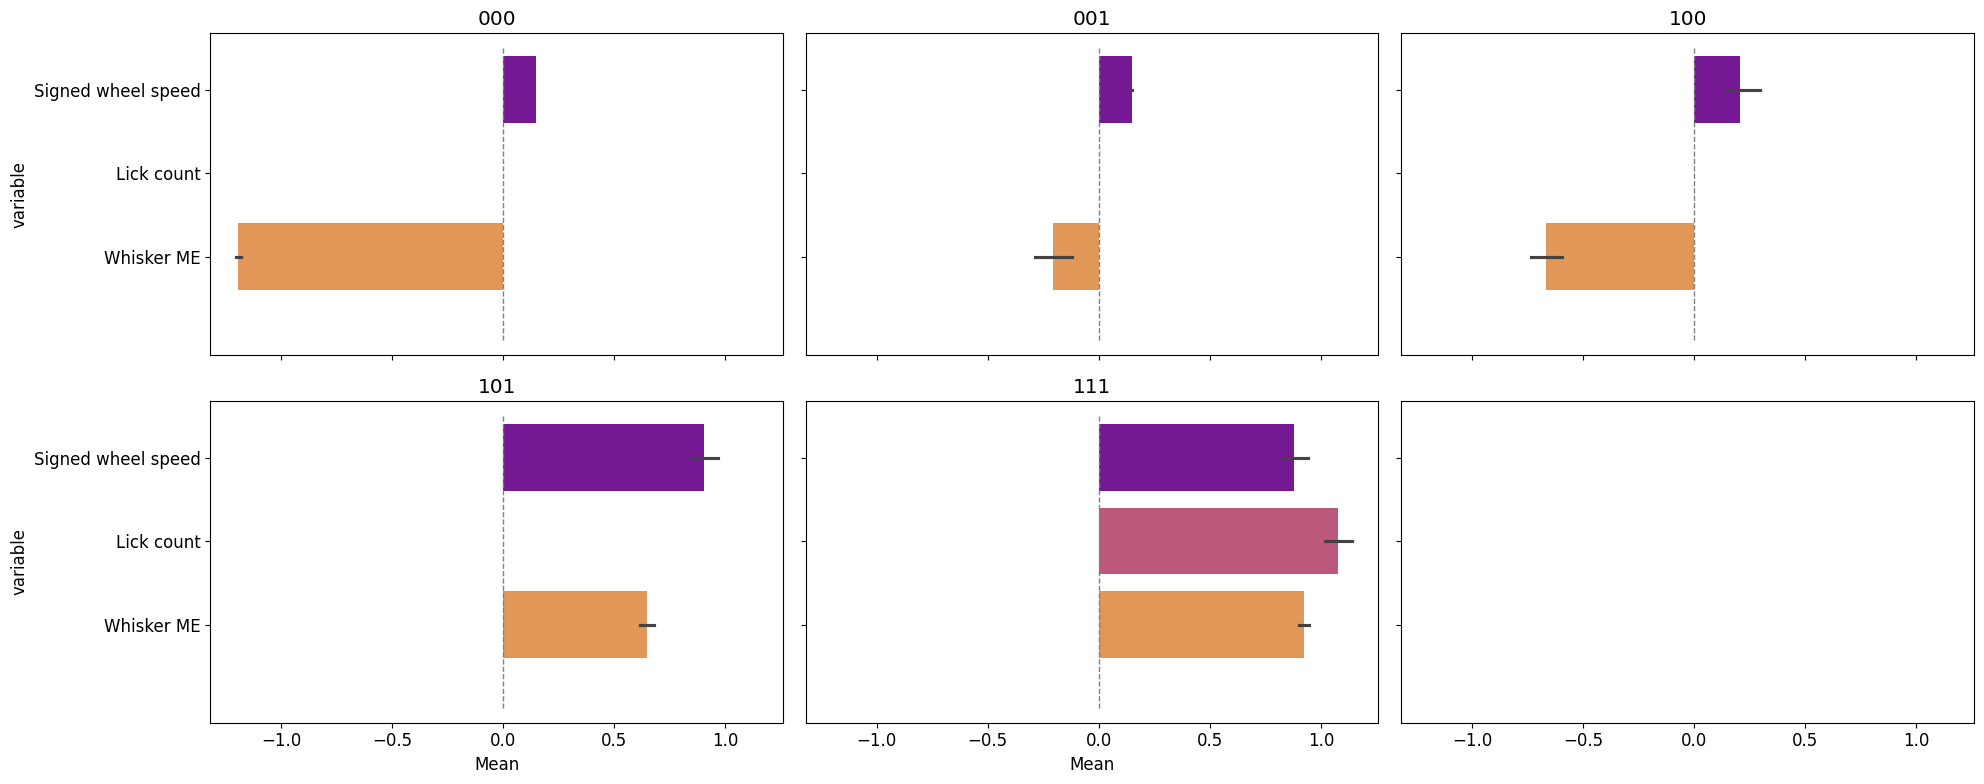

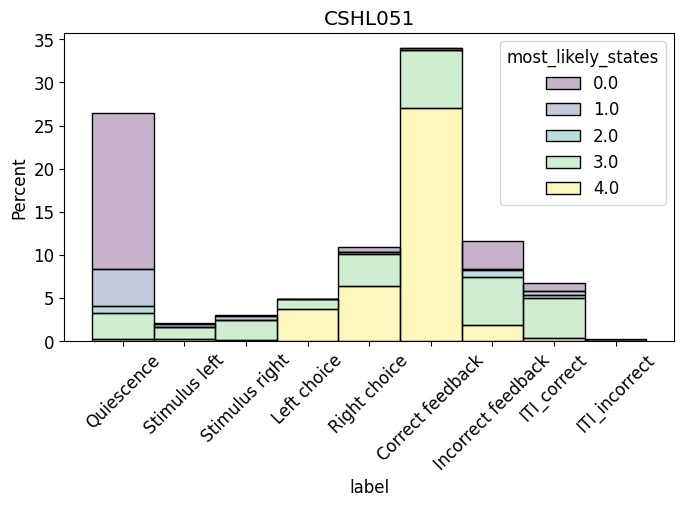

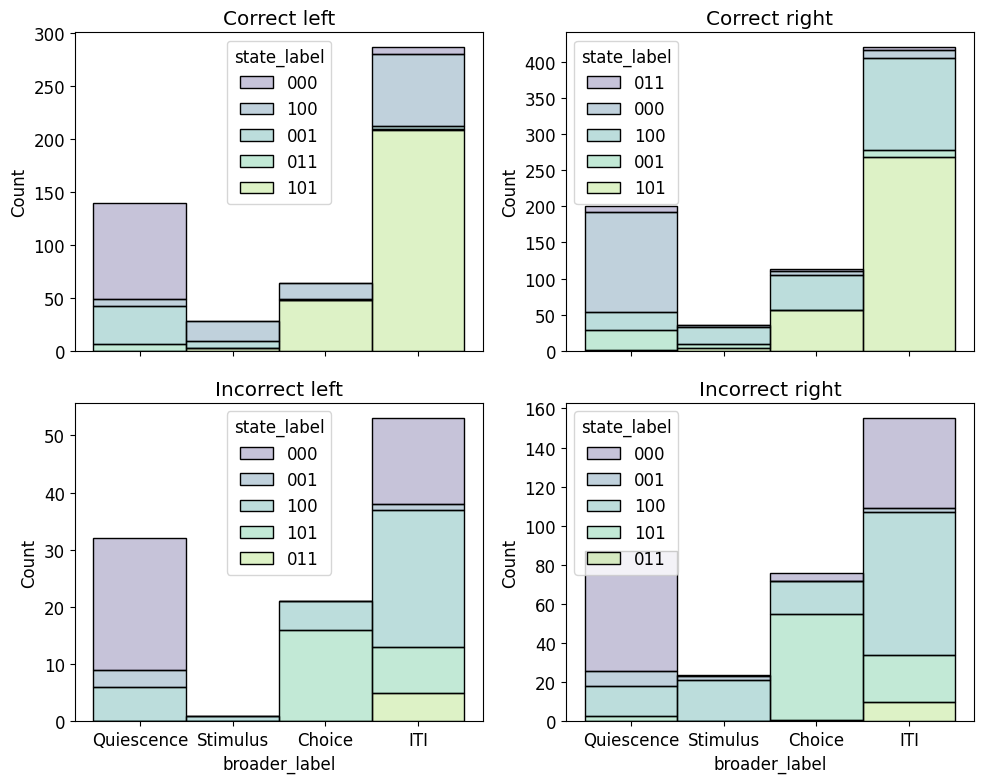

/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  quiescence_states = quiescence_states.append(quiescence_data[['correct', 'choice', 'contrast', 'most_likely_states', 'Bin']])
/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:229: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correct_states = correct_states.append(correct_data[['correct', 'choice', 'contrast', 'most_likely_states', 'Bin']])
/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

CSHL052


/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ITI_states_correct = ITI_states_correct.append(ITI_data_correct[['correct', 'choice', 'contrast', 'most_likely_states', 'Bin']])
/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:249: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  right_states = right_states.append(move_data[['correct', 'choice', 'contrast', 'most_likely_states', 'Bin']])
/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

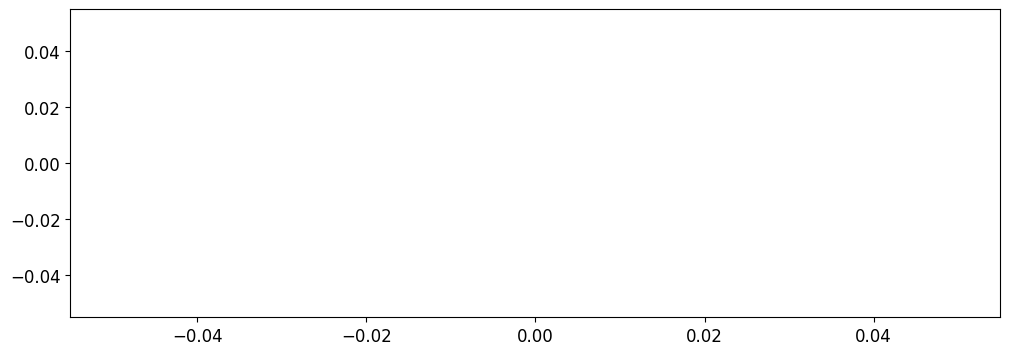

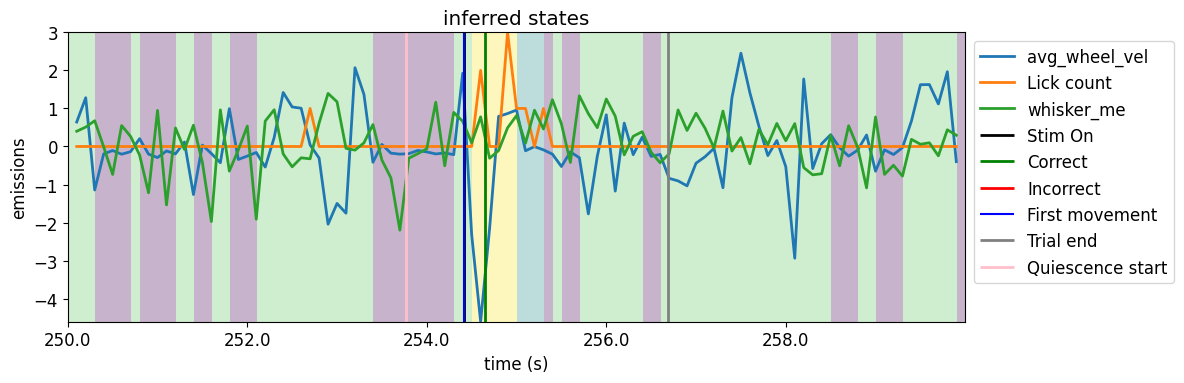

/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:800: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='variable', x='value', data=use_data, ax=ax[0,s], palette='plasma')
/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:800: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='variable', x='value', data=use_data, ax=ax[0,s], palette='plasma')
/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:800: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be rem

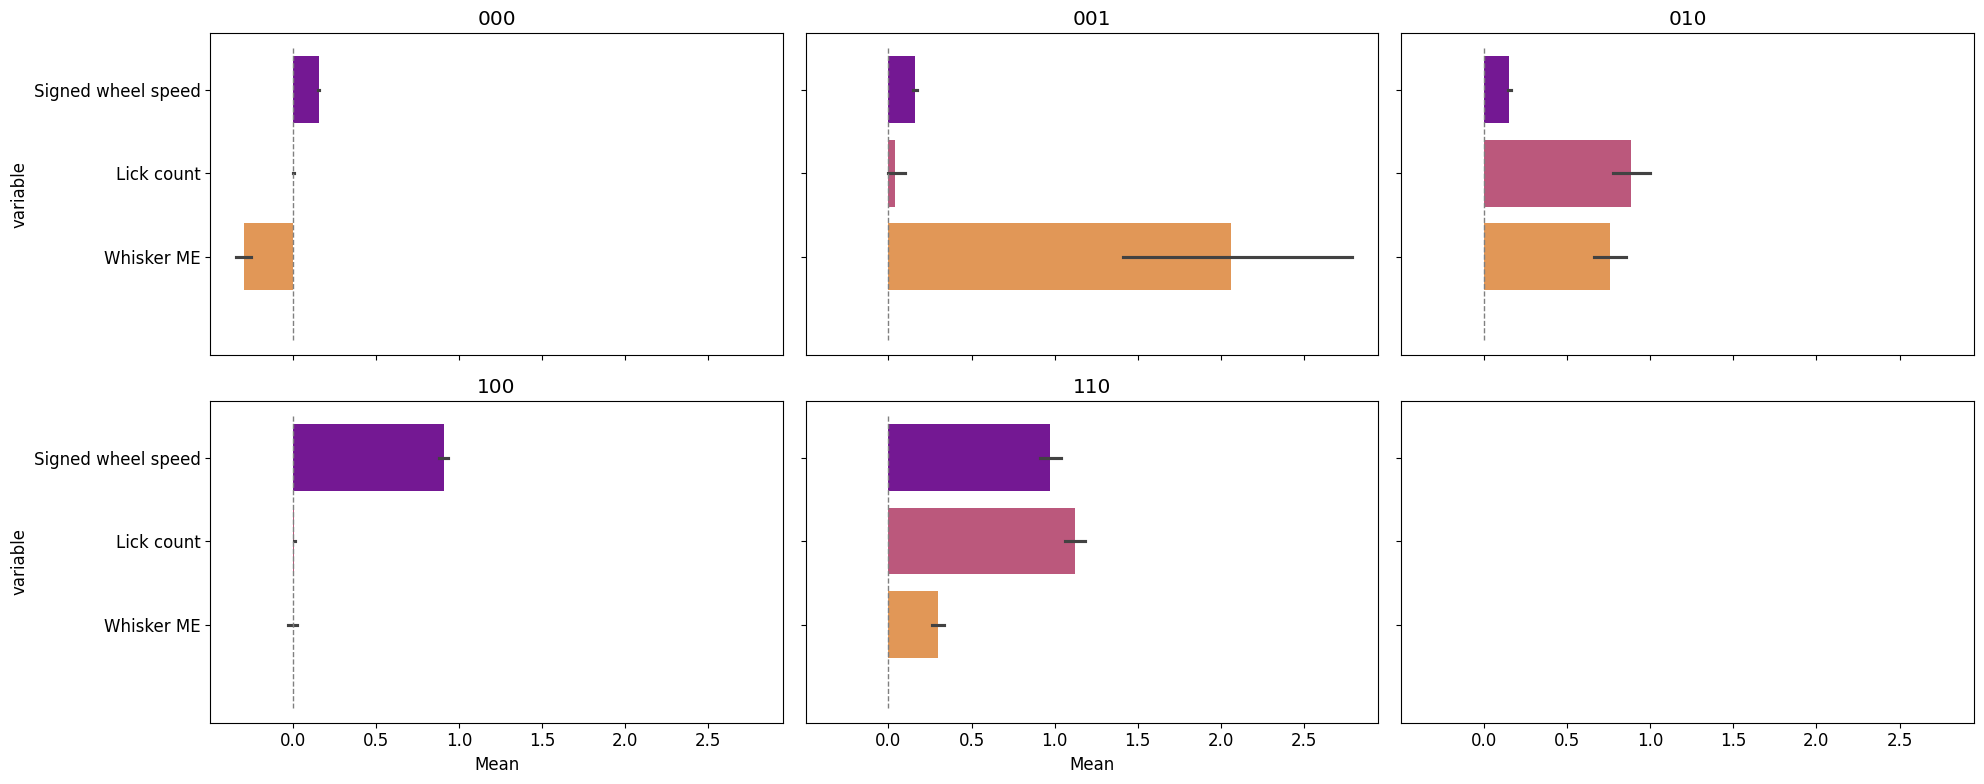

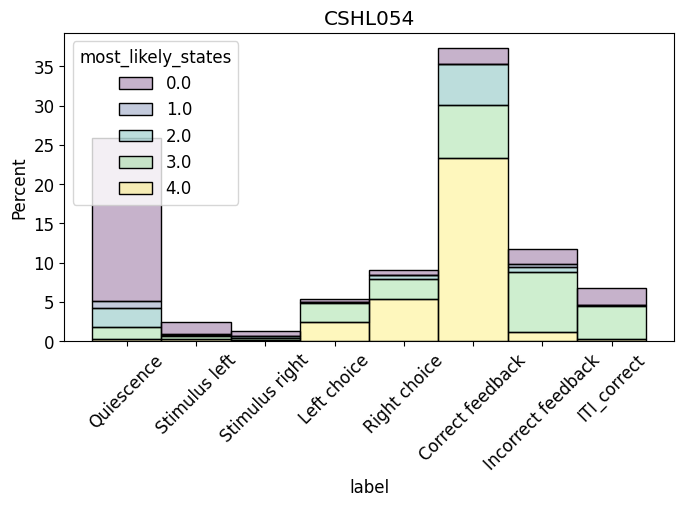

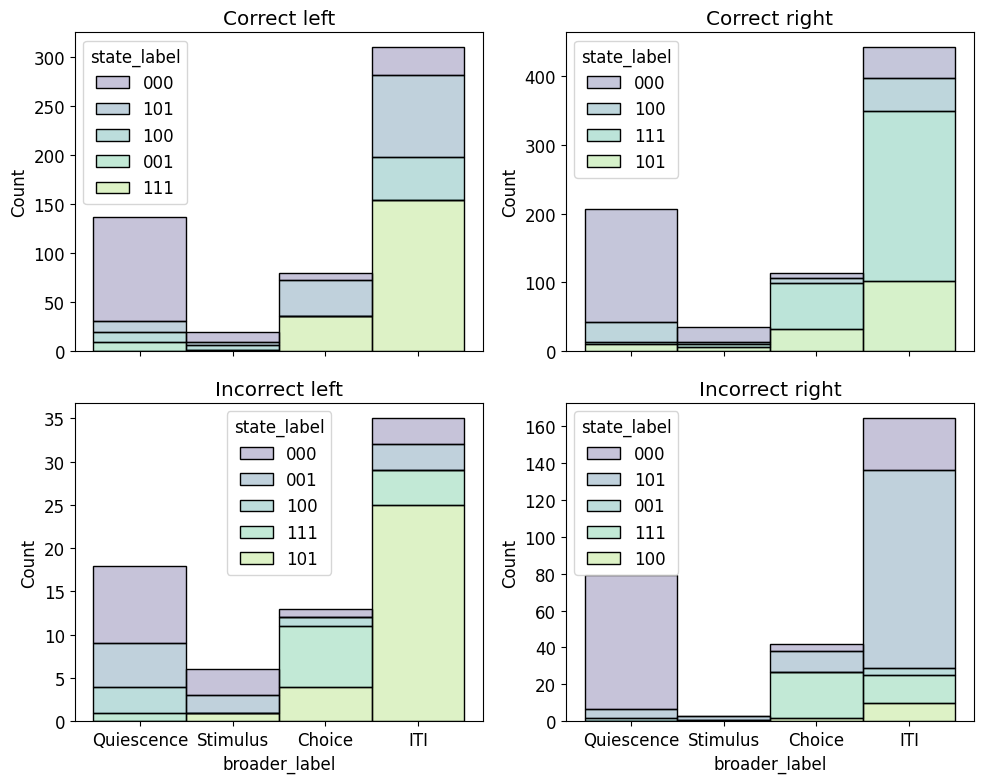

/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  quiescence_states = quiescence_states.append(quiescence_data[['correct', 'choice', 'contrast', 'most_likely_states', 'Bin']])
/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:229: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correct_states = correct_states.append(correct_data[['correct', 'choice', 'contrast', 'most_likely_states', 'Bin']])
/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

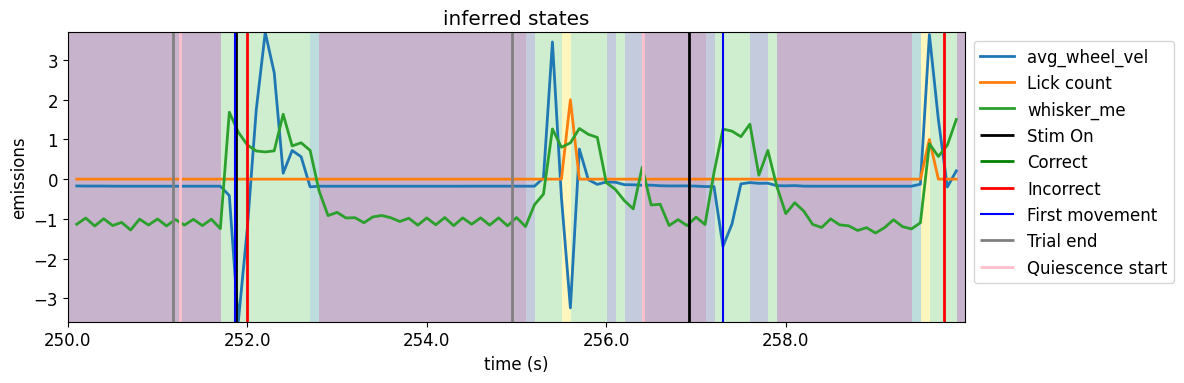

/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:800: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='variable', x='value', data=use_data, ax=ax[0,s], palette='plasma')
/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:800: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='variable', x='value', data=use_data, ax=ax[0,s], palette='plasma')
/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:800: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be rem

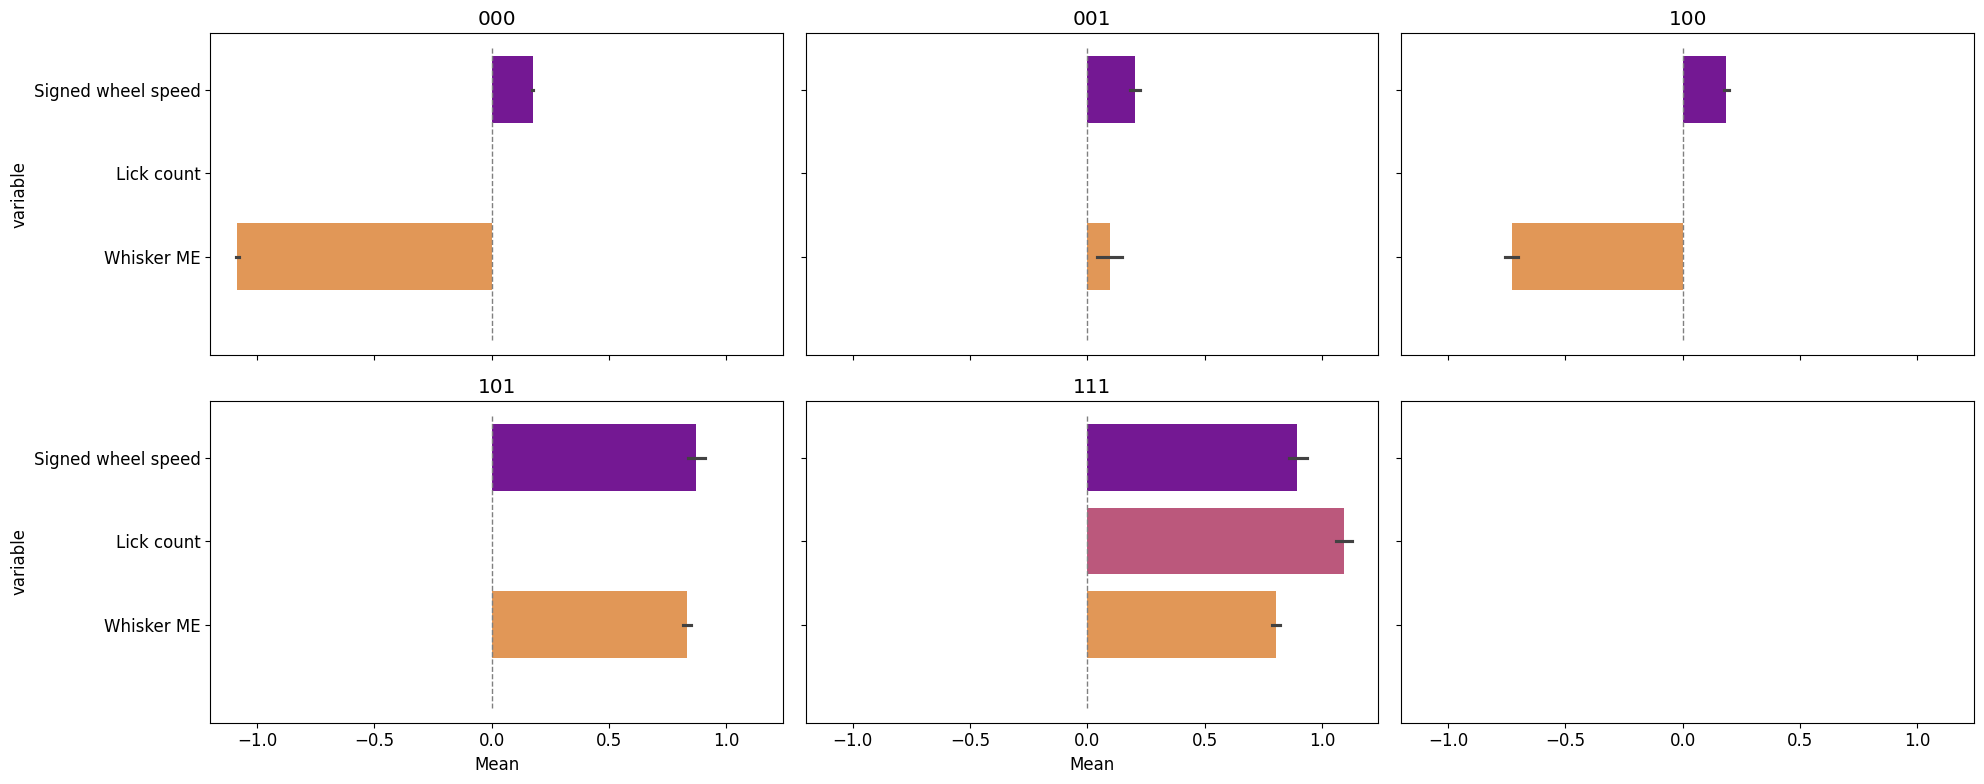

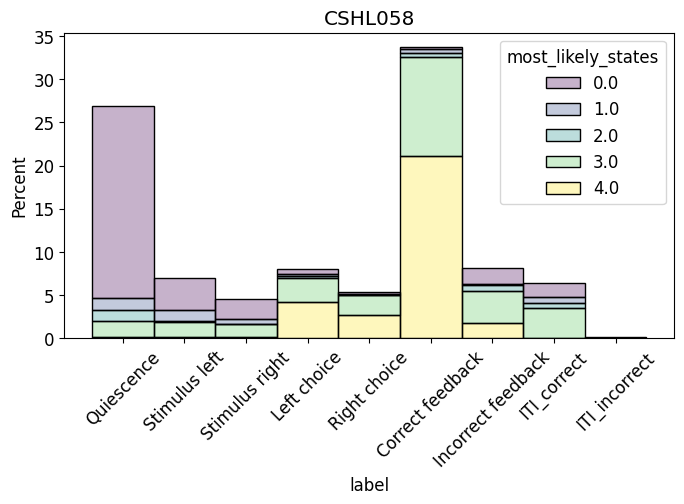

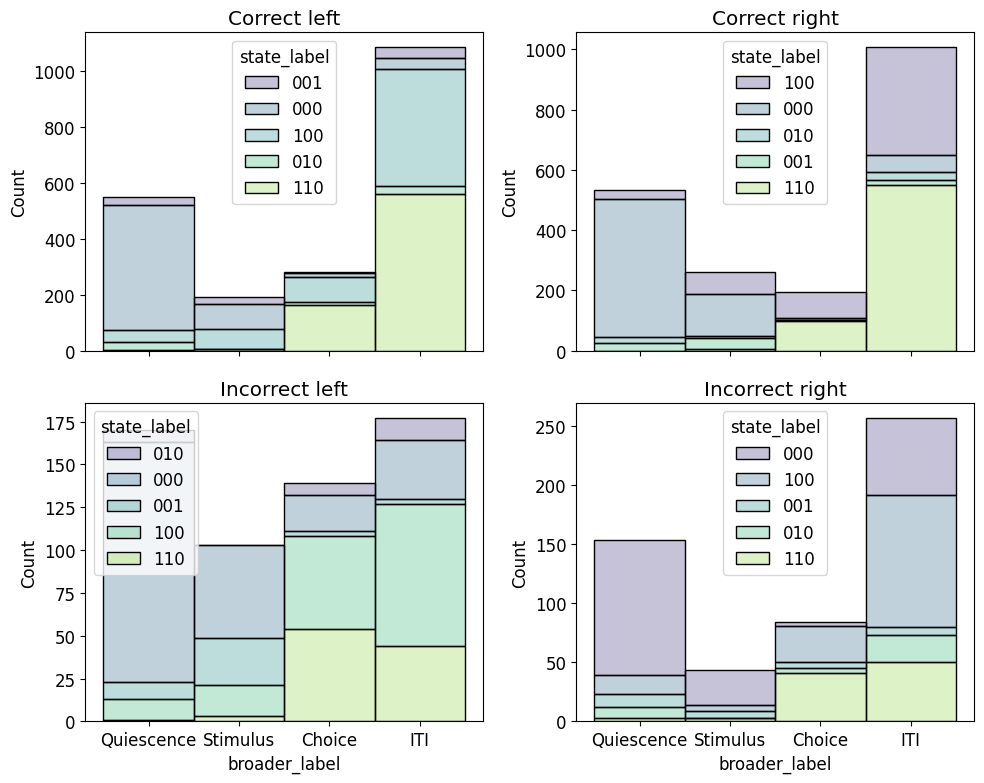

/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  quiescence_states = quiescence_states.append(quiescence_data[['correct', 'choice', 'contrast', 'most_likely_states', 'Bin']])
/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:229: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correct_states = correct_states.append(correct_data[['correct', 'choice', 'contrast', 'most_likely_states', 'Bin']])
/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

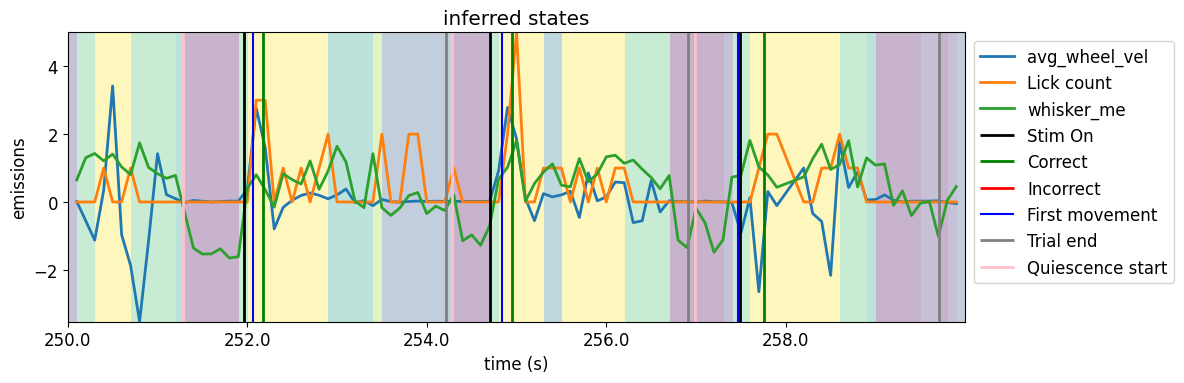

/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:800: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='variable', x='value', data=use_data, ax=ax[0,s], palette='plasma')
/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:800: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='variable', x='value', data=use_data, ax=ax[0,s], palette='plasma')
/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:800: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be rem

CSHL059


/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  quiescence_states = quiescence_states.append(quiescence_data[['correct', 'choice', 'contrast', 'most_likely_states', 'Bin']])
/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:229: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correct_states = correct_states.append(correct_data[['correct', 'choice', 'contrast', 'most_likely_states', 'Bin']])
/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

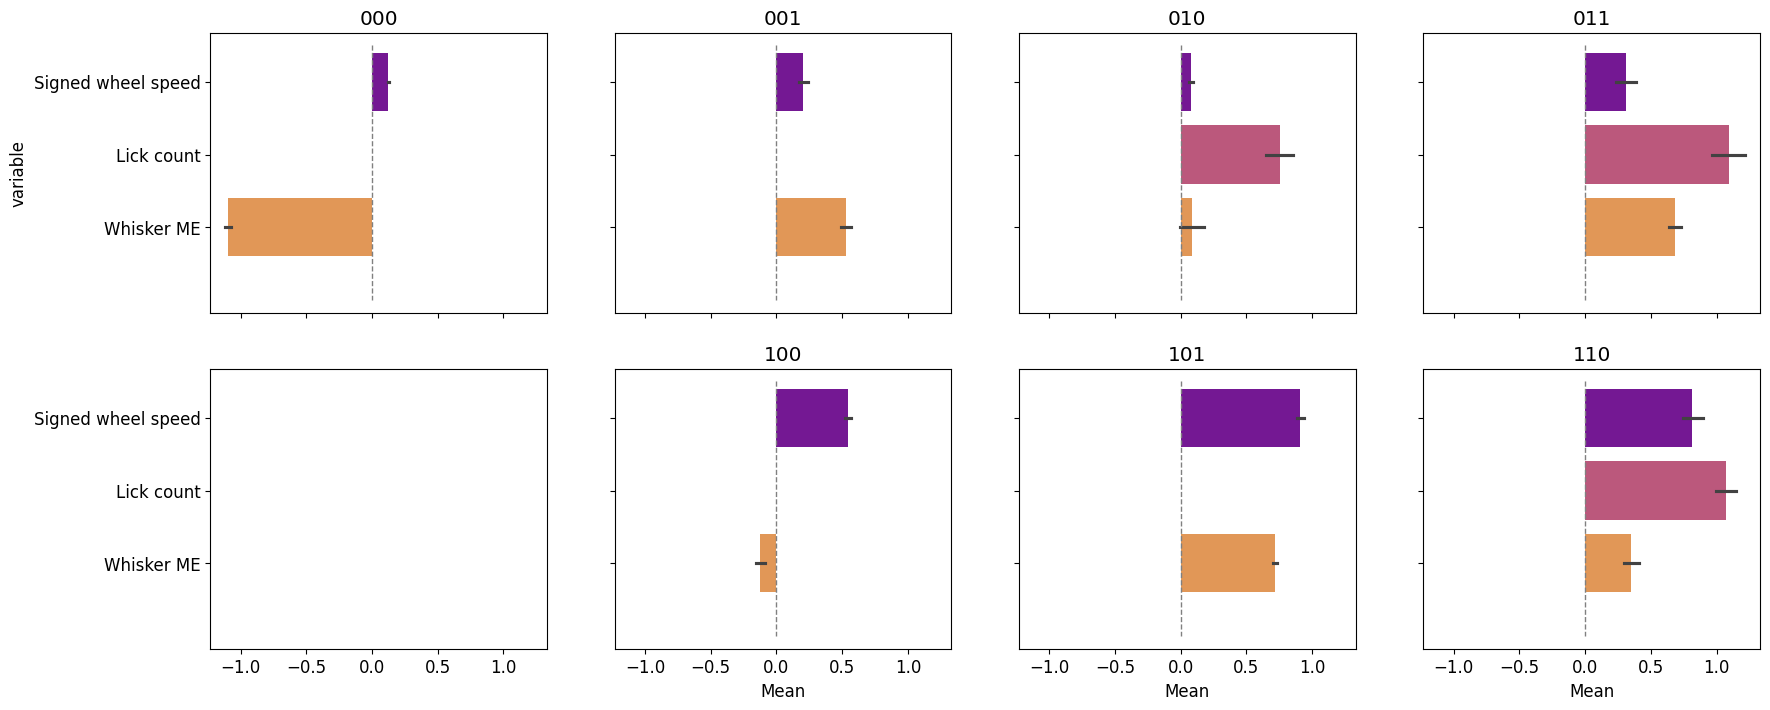

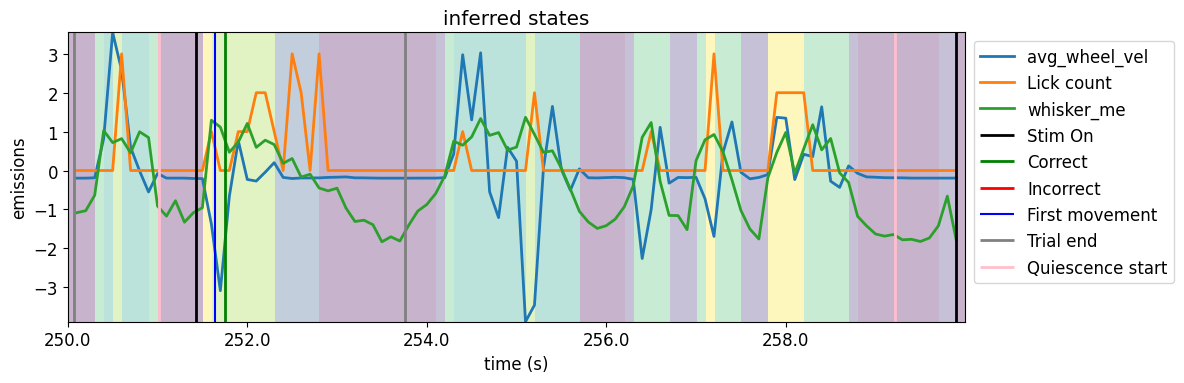

/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:800: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='variable', x='value', data=use_data, ax=ax[0,s], palette='plasma')
/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:800: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='variable', x='value', data=use_data, ax=ax[0,s], palette='plasma')
/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:800: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be rem

CSHL060
DY_008


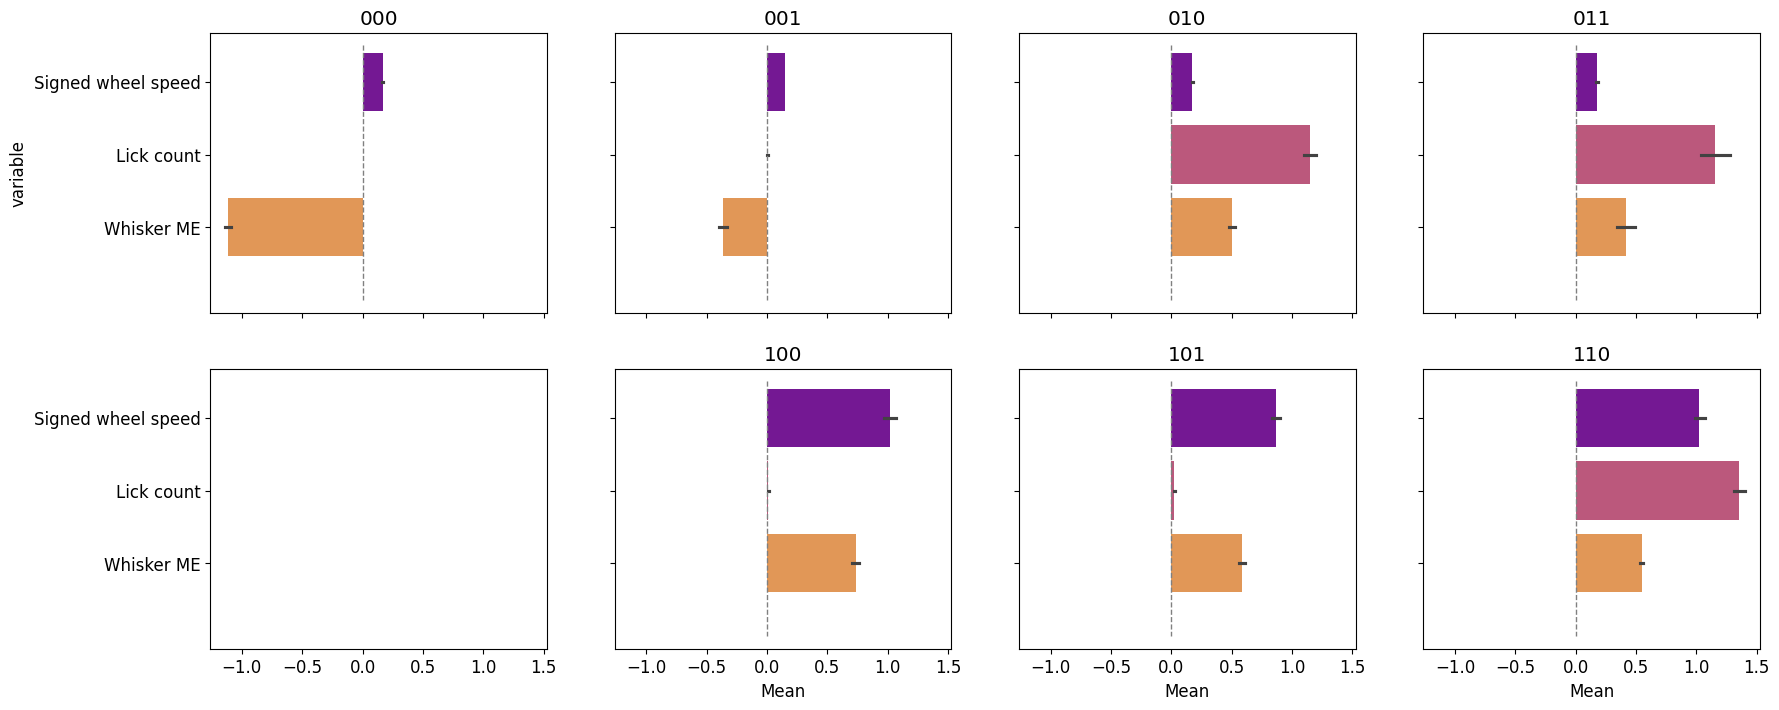

In [123]:
# Loop through animals
for m, mouse_name in enumerate(np.unique(mouse_names)[0:10]):
    try:
        var_names = ['avg_wheel_vel', 'Lick count', 'whisker_me']

        # Get mouse data
        session_trials = collapsed_trials[mouse_name].copy()
        design_matrix = collapsed_matrices[mouse_name][:,0:3].copy()  # TODO: find a way for this not to be hardcoded
        unnorm_mat = collapsed_unnorm[mouse_name][var_names].copy()
        unnorm_mat['Bin'] = collapsed_unnorm[mouse_name]['Bin'].copy()

        # Get states per variable and concatenate
        states_path =  '/home/ines/repositories/representation_learning_variability/DATA/Sub-trial/Results/' + str(bin_size) + '/most_likely_states/'
        os.chdir(states_path)

        c_states = []
        for s, set in enumerate(use_sets):
            
            jax_most_likely_states, _ = pickle.load(open("most_likely_states" + set[0] + '_' + mouse_name, "rb"))
            # Note: most_likely_states is shorter because it was trimmed in order to match training batches, but starts in the same place
            
            # Flip states so that 0 is no movement and 1 is movement
            set_var = design_matrix[:, s]
            was_zero = np.where(jax_most_likely_states==0.)[0]
            was_one = np.where(jax_most_likely_states==1.)[0]
            
            most_likely_states = np.array(jax_most_likely_states)
            
            # invert
            if set == ['avg_wheel_vel']:
                mean_0 =  np.mean(np.abs(set_var[was_zero]))
                mean_1 = np.mean(np.abs(set_var[was_one]))
            else:
                mean_0 =  np.mean(set_var[was_zero])
                mean_1 = np.mean(set_var[was_one])
                            
            if mean_0 > mean_1:
                most_likely_states[was_zero] = 1.
                most_likely_states[was_one] = 0.

            # Save
            if len(c_states) == 0:
                c_states = most_likely_states
            else:
                c_states = np.vstack((c_states, most_likely_states))      
        
        combined_states = remove_states_str(c_states.T, threshold)
            
        # Change states back to integer
        state_labels = np.unique(combined_states)
        int_state = np.arange(0, len(state_labels), 1).astype(float)
        if state_labels[-1] == 'nan':
            int_state[-1] = np.nan
        # Define the mapping as a dictionary
        mapping = {unique: key for unique, key in zip(state_labels, int_state)}

        # Use np.vectorize to apply the mapping
        replace_func = np.vectorize(mapping.get)
        new_states = replace_func(combined_states)

        " Prepare data "
        # Prepare data 
        num_timesteps = np.shape(design_matrix)[0]
        num_states = len(np.unique(new_states))
        design_matrix_heading = pd.DataFrame(columns=var_names)
        design_matrix_heading[var_names] = design_matrix[0:len(new_states)]  # TODO: need to understand why number is the same and whether it depends on lag
        bins = unnorm_mat[:(num_timesteps // num_train_batches) * num_train_batches]['Bin']
        design_matrix_heading['Bin'] = bins
        design_matrix_heading['Lick count'] = unnorm_mat[:(num_timesteps // num_train_batches) * num_train_batches]['Lick count']
        # Fix discontinuities
        cont_trials, cont_design_matrix_heading = fix_discontinuities(session_trials, design_matrix_heading, multiplier)
        
        # Align bins
        init = -1 * multiplier
        end = 1.5 * multiplier
        empirical_data = align_bin_design_matrix(init, end, event_type_list, cont_trials, cont_design_matrix_heading, new_states, multiplier)
        states_trial = states_per_trial_phase(empirical_data, cont_trials, multiplier)
        # Use np.vectorize to apply the mapping
        replace_func = np.vectorize(inverted_mapping.get)
        states_trial['state_label'] = replace_func(states_trial['most_likely_states'])
                
        """ Plot raw traces over states """
        init = 250 * multiplier # First bin
        inter = 10 * multiplier
        traces_over_few_sates(init, inter, empirical_data, cont_trials, var_names, multiplier)
        # traces_over_sates(init, inter, empirical_data, cont_trials)
        
        """ Plot state empirical mean """
        inverted_mapping = {v: k for k, v in mapping.items()}
        unique_states = np.array(list(inverted_mapping.keys()))
        unique_states = unique_states[~np.isnan(unique_states)] 
        plot_avg_state(unique_states, empirical_data, inverted_mapping)
            

        # """ Stack trial states """
        # trial_init = 30  # First trial to plot
        # trials_to_plot = 20  # How many trials to plot (if very different will compromise readibility)
        # plot_states_aligned_trial(trial_init, empirical_data, cont_trials, bin_size, trials_to_plot, num_states)

        # " Plot states stacked and aligned per trial type "
        # # plot_states_aligned(init, end, empirical_data, event_type_name, bin_size)
        
        """ Plot states per trial epoch """
        colors = sns.color_palette("viridis", num_states)
        # states_trial = states_per_trial_phase(empirical_data, session_trials, multiplier)
        # states_trial = states_per_trial_phase(empirical_data, cont_trials, multiplier)
        plt.figure(figsize=[7, 5])
        sns.histplot(x='label', hue='most_likely_states', data=states_trial, stat = 'percent',
                            multiple="stack", legend=True, palette='viridis', alpha=0.3)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.title(mouse_name)
        plt.show()
        
        plot_states_trial_type(states_trial)

    except:
        print(mouse_name)

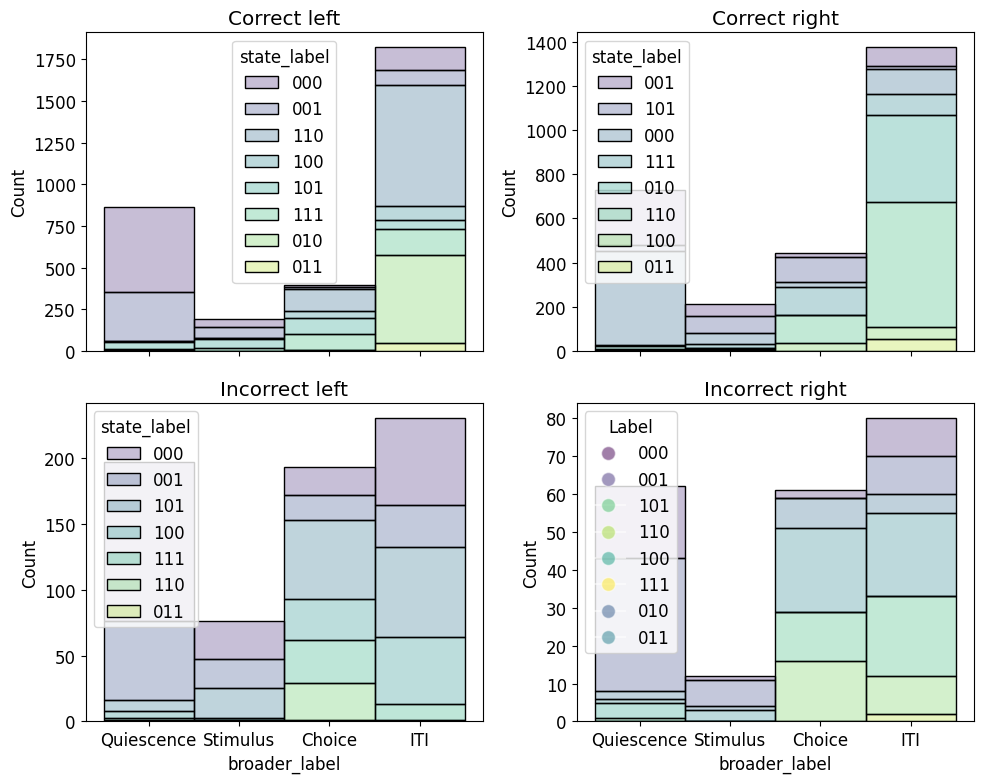

In [144]:
plot_states_trial_type(states_trial)

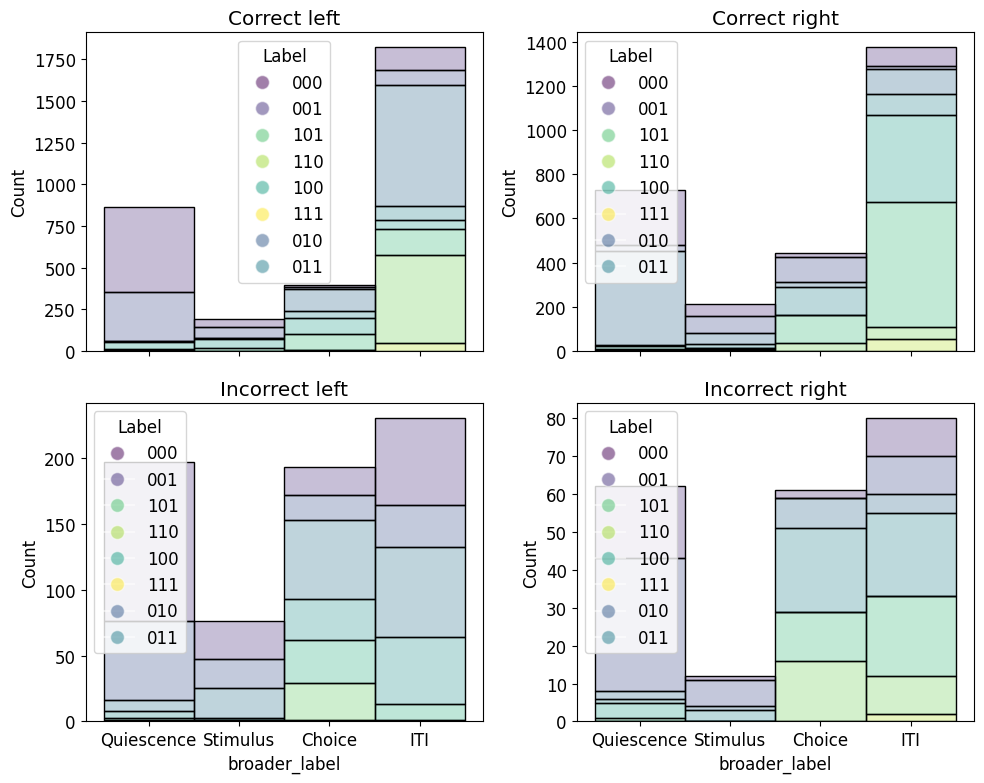

In [150]:
plot_states_trial_type(states_trial)

In [149]:
def plot_states_trial_type(states_trial):
    """ Plot states per trial epoch """
    colors = sns.color_palette("viridis", num_states)

    fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=False, figsize=[10, 8])
    df_epoch = broader_label(states_trial)
    
    # Create custom legend
    unique_hues = df_epoch['most_likely_states'].unique()
    unique_labels = df_epoch['state_label'].unique()
    handles = [plt.Line2D([0], [0], marker='o', color='w', alpha=0.5, markerfacecolor=plt.cm.viridis(i / max(unique_hues)), markersize=10) for i in unique_hues]

    correct_left = df_epoch.loc[(df_epoch['correct']==1.) & (df_epoch['choice']=='left')]
    sns.histplot(x='broader_label', hue='state_label', data=correct_left, stat = 'count',
                        multiple="stack", legend=True, palette='viridis', alpha=0.3, ax=axs[0, 0])
    axs[0, 0].set_title('Correct left')
    axs[0, 0].legend(handles, unique_labels, title='Label')

    correct_right = df_epoch.loc[(df_epoch['correct']==1.) & (df_epoch['choice']=='right')]
    sns.histplot(x='broader_label', hue='state_label', data=correct_right, stat = 'count',
                        multiple="stack", legend=True, palette='viridis', alpha=0.3, ax=axs[0, 1])
    axs[0, 1].set_title('Correct right')
    axs[0, 1].legend(handles, unique_labels, title='Label')

    incorrect_left = df_epoch.loc[(df_epoch['correct']==0.) & (df_epoch['choice']=='left')]
    sns.histplot(x='broader_label', hue='state_label', data=incorrect_left, stat = 'count',
                        multiple="stack", legend=True, palette='viridis', alpha=0.3, ax=axs[1, 0])
    axs[1, 0].set_title('Incorrect left')
    axs[1, 0].legend(handles, unique_labels, title='Label')

    incorrect_right = df_epoch.loc[(df_epoch['correct']==0.) & (df_epoch['choice']=='right')]
    sns.histplot(x='broader_label', hue='state_label', data=incorrect_right, stat = 'count',
                        multiple="stack", legend=True, palette='viridis', alpha=0.3, ax=axs[1, 1])
    axs[1, 1].set_title('Incorrect right')
    axs[1, 1].legend(handles, unique_labels, title='Label')
        
    # axs[1, 0].set_xticks(rotation=45)
    # axs[1, 1].set_xticks(rotation=45)
    plt.tight_layout()
    # plt.title(mouse_name)
    plt.show()

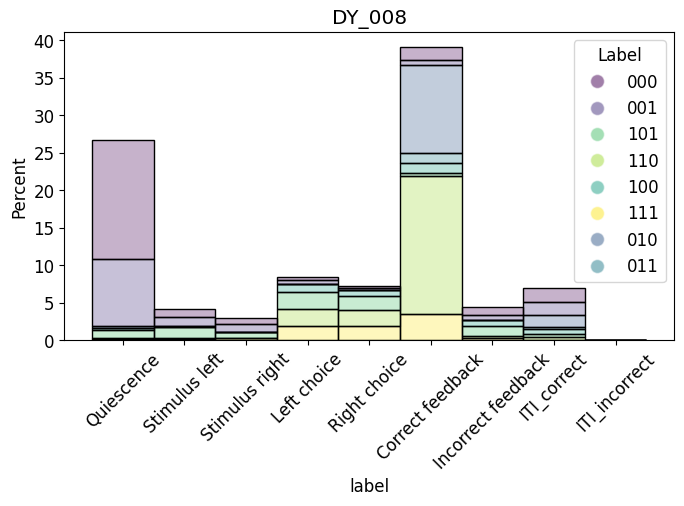

In [140]:
        """ Plot states per trial epoch """
        colors = sns.color_palette("viridis", num_states)
        # states_trial = states_per_trial_phase(empirical_data, session_trials, multiplier)
        # states_trial = states_per_trial_phase(empirical_data, cont_trials, multiplier)
        df_epoch = broader_label(states_trial)
        plt.figure(figsize=[7, 5])
        hist = sns.histplot(x='label', hue='most_likely_states', data=df_epoch, stat = 'percent',
                            multiple="stack", palette='viridis', alpha=0.3)


        # Create custom legend
        unique_hues = df_epoch['most_likely_states'].unique()
        unique_labels = df_epoch['state_label'].unique()
        handles = [plt.Line2D([0], [0], marker='o', color='w', alpha=0.5, markerfacecolor=plt.cm.viridis(i / max(unique_hues)), markersize=10) for i in unique_hues]
        plt.legend(handles, unique_labels, title='Label')

        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.title(mouse_name)
        plt.show()


In [134]:
labels

[]

In [132]:
hue_labels

{0.0: '000',
 1.0: '001',
 5.0: '101',
 6.0: '110',
 4.0: '100',
 7.0: '111',
 2.0: '010',
 3.0: '011'}

In [131]:
new_labels

[]

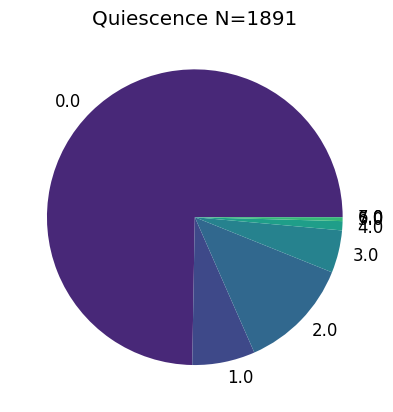

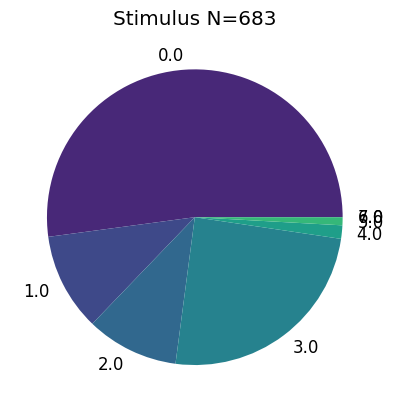

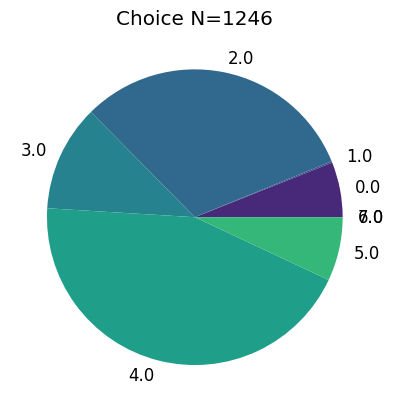

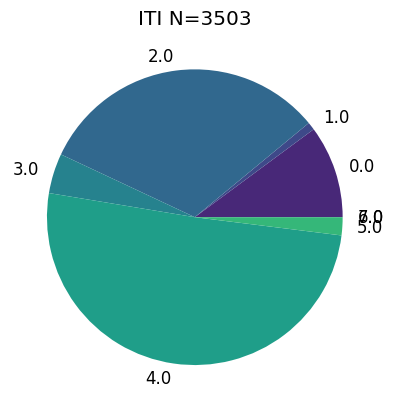

In [27]:
palette_color = sns.color_palette('viridis', n_colors=num_states)
use_label = 'broader_label'
epochs = df_epoch[use_label].unique()

st = np.unique(new_states)

for epoch in epochs:
    all_counts = np.zeros(len(st))
    unique, counts = np.unique(df_epoch.loc[df_epoch[use_label]==epoch, 'most_likely_states'], return_counts=True)
    all_counts[unique.astype(int)] = counts
    plt.pie(all_counts, labels=st,  colors=palette_color)  # , labels=keys
    plt.title(str(epoch + ' N=' + str(int(sum(all_counts))) ))
    plt.show()